In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas.plotting import register_matplotlib_converters
import seaborn


In [3]:
# Function to download data using yfinance
def download_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

In [4]:
ticker = 'GC=F'  # Gold as an example
start_date = '2020-10-22'
end_date = '2024-10-22'


In [5]:
df = download_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


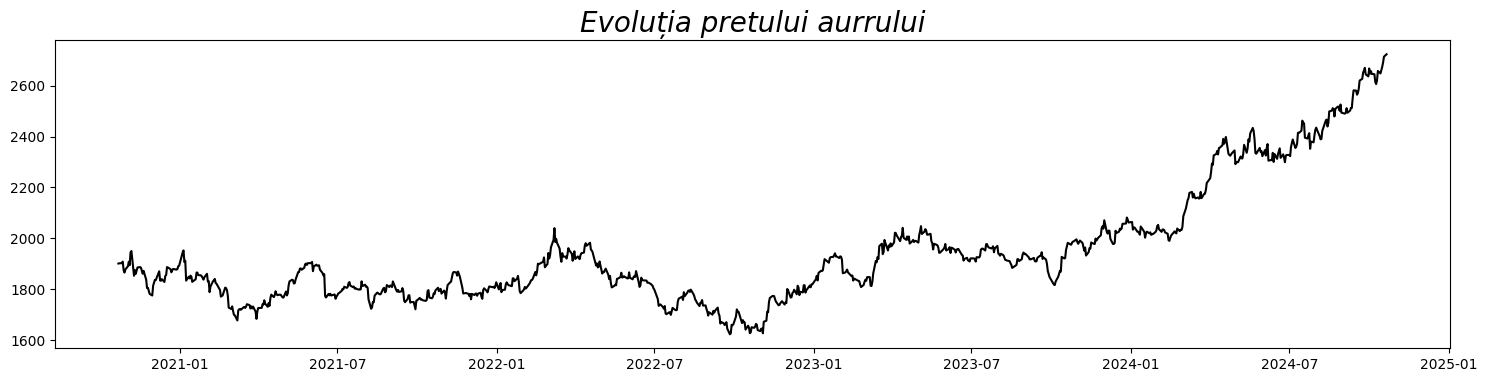

In [6]:
seaborn.set_palette('crest')
plt.figure(figsize=(18,4), facecolor='white')
plt.plot(df.Close, color='black')
plt.title('Evoluția pretului aurrului', fontsize=20, fontstyle='italic')
plt.show()


In [7]:
df['simple_rtn']=df.Close.pct_change()*100
df['log_rtn']=np.log(df.Close/df.Close.shift(1))*100
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,simple_rtn,log_rtn
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F,,
Date,,,,,,,,
2020-10-22 00:00:00+00:00,1901.099976,1901.099976,1924.300049,1898.199951,1924.300049,899,NaN,NaN
2020-10-23 00:00:00+00:00,1902.000000,1902.000000,1913.300049,1896.199951,1899.900024,287,0.047342,0.047331
2020-10-26 00:00:00+00:00,1902.699951,1902.699951,1907.000000,1893.500000,1895.500000,242,0.036801,0.036794
2020-10-27 00:00:00+00:00,1908.800049,1908.800049,1908.800049,1904.400024,1904.599976,176,0.320602,0.320089
2020-10-28 00:00:00+00:00,1876.199951,1876.199951,1876.199951,1870.900024,1870.900024,277,-1.707884,-1.722637


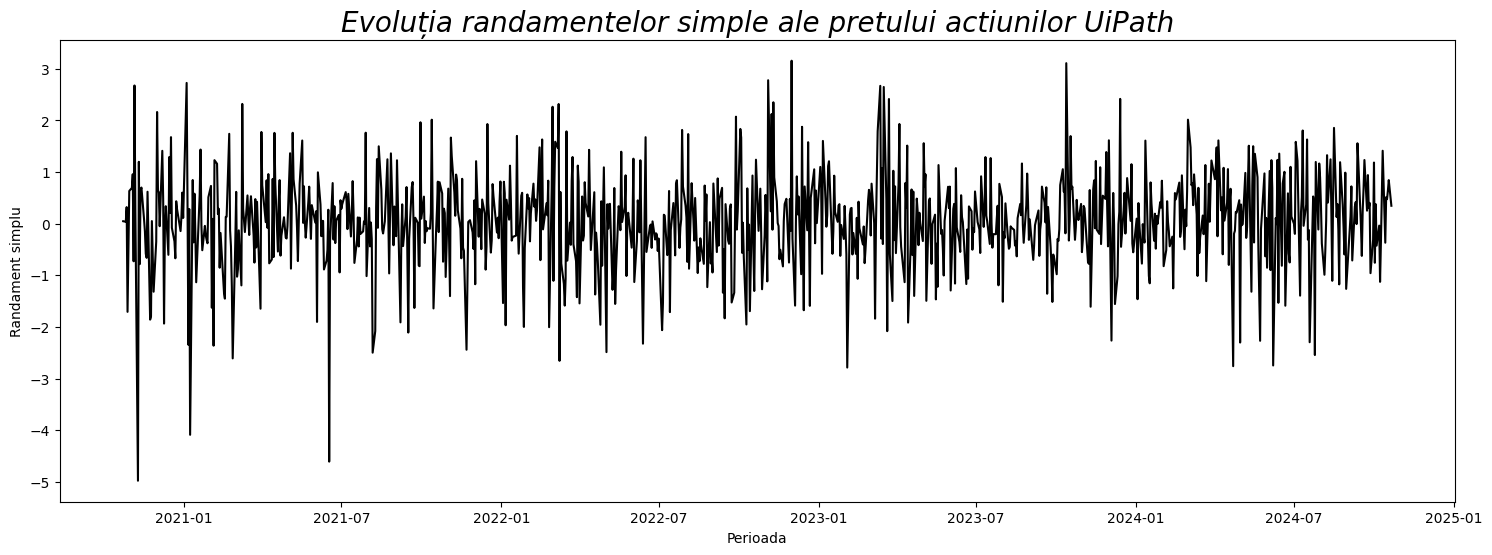

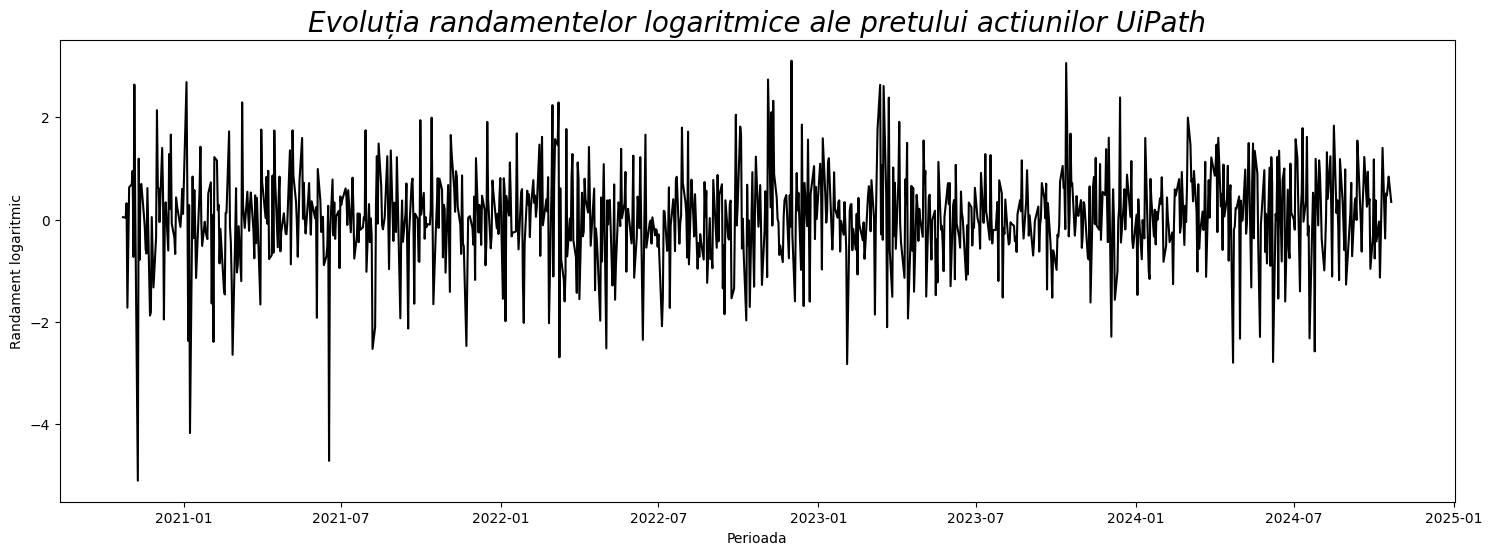

In [8]:
plt.figure(figsize=(18,6), facecolor='white')
plt.plot(df.simple_rtn, color='black')
plt.title('Evoluția randamentelor simple ale pretului actiunilor UiPath', fontsize=20, fontstyle='italic')
plt.ylabel('Randament simplu')
plt.xlabel('Perioada')

plt.figure(figsize=(18,6), facecolor='white')
plt.plot(df.log_rtn, color='black')
plt.title('Evoluția randamentelor logaritmice ale pretului actiunilor UiPath', fontsize=20, fontstyle='italic')
plt.ylabel('Randament logaritmic')
plt.xlabel('Perioada')

plt.show()

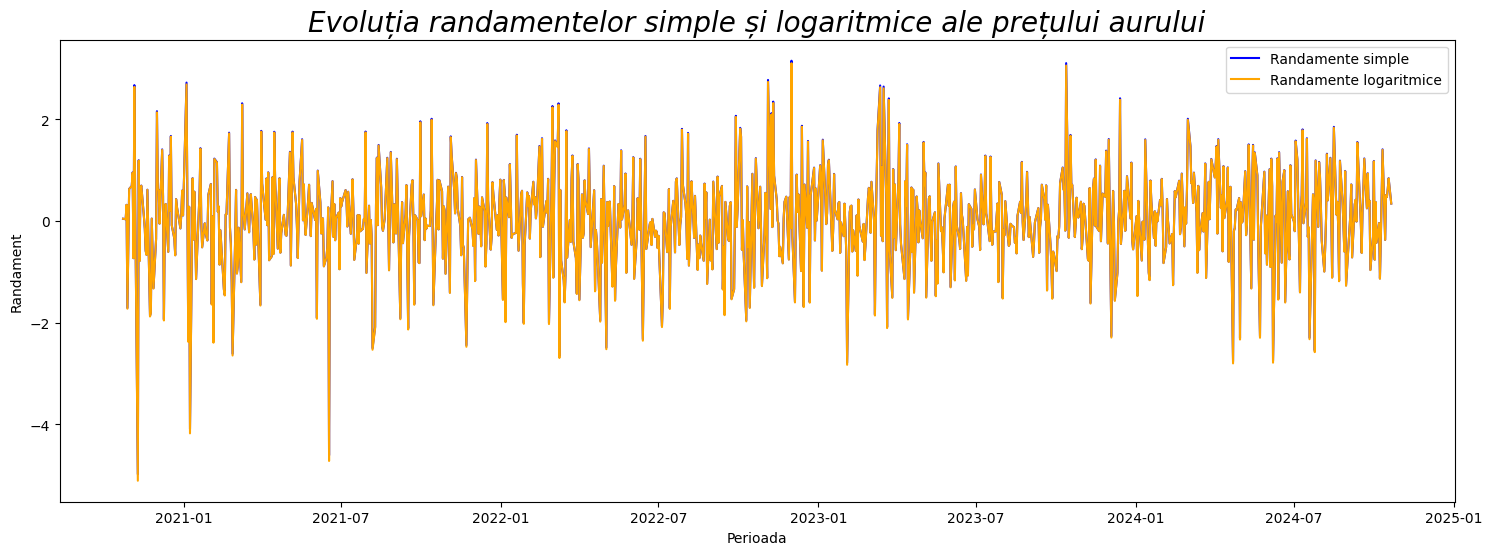

In [9]:
plt.figure(figsize=(18,6))

plt.plot(df.simple_rtn, label='Randamente simple', color='blue')
plt.plot(df.log_rtn, label='Randamente logaritmice', color='orange')
plt.title('Evoluția randamentelor simple și logaritmice ale prețului aurului', fontsize=20, fontstyle='italic')
plt.ylabel('Randament')
plt.xlabel('Perioada')
plt.legend()


# show graphic
plt.show()

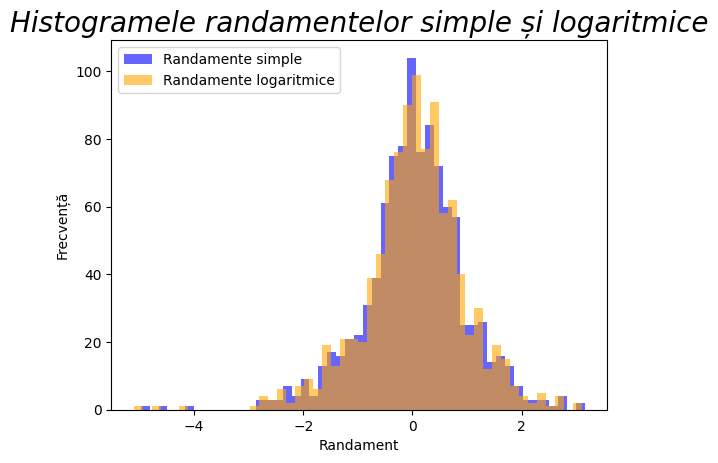

In [10]:

plt.hist(df.simple_rtn.dropna(), bins=50, alpha=0.6, label='Randamente simple', color='blue')
plt.hist(df.log_rtn.dropna(), bins=50, alpha=0.6, label='Randamente logaritmice', color='orange')
plt.title('Histogramele randamentelor simple și logaritmice', fontsize=20, fontstyle='italic')
plt.xlabel('Randament')
plt.ylabel('Frecvență')
plt.legend()


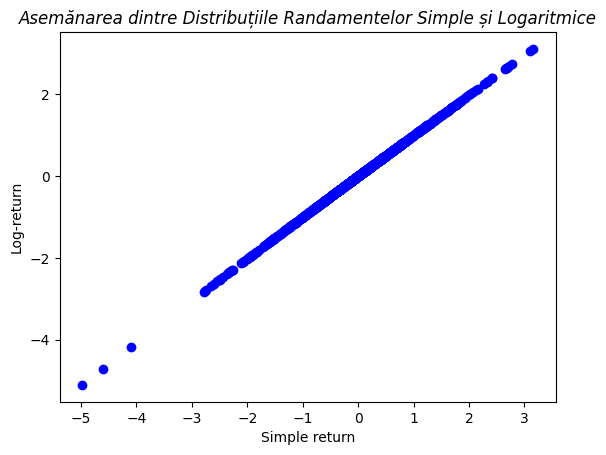

In [11]:
plt.plot(df.simple_rtn, df.log_rtn, 'o',c='blue')
plt.ylabel( 'Log-return' )
plt.xlabel( 'Simple return' )
plt.title('Asemănarea dintre Distribuțiile Randamentelor Simple și Logaritmice', fontsize=12, fontstyle='italic')
plt.show()

In [12]:
s_returns=df.simple_rtn.dropna()
log_returns=df.log_rtn.dropna()
log_returns.describe()

,log_rtn
count,1004.000000
mean,0.035791
std,0.929567
min,-5.106938
25%,-0.439090
50%,0.050493
75%,0.579854
max,3.107012


### **Estimate Historical Volatility**


In [13]:
from scipy import stats
daily_volatility = log_returns.std()

# Annualize the volatility
annual_volatility = daily_volatility * np.sqrt(252)

print(f"Daily Volatility: {daily_volatility:.4f}")
print(f"Annualized Volatility: {annual_volatility:.4f}")
print('mean =',np.mean(log_returns))
print('skewness=',stats.skew(log_returns))
print('kurtosis=',stats.kurtosis(log_returns))

Daily Volatility: 0.9296
Annualized Volatility: 14.7564
mean = 0.03579066931348023
skewness= -0.49358916840193723
kurtosis= 2.327916368788382


Volatilitatea istorică anualizată: 1475.64%


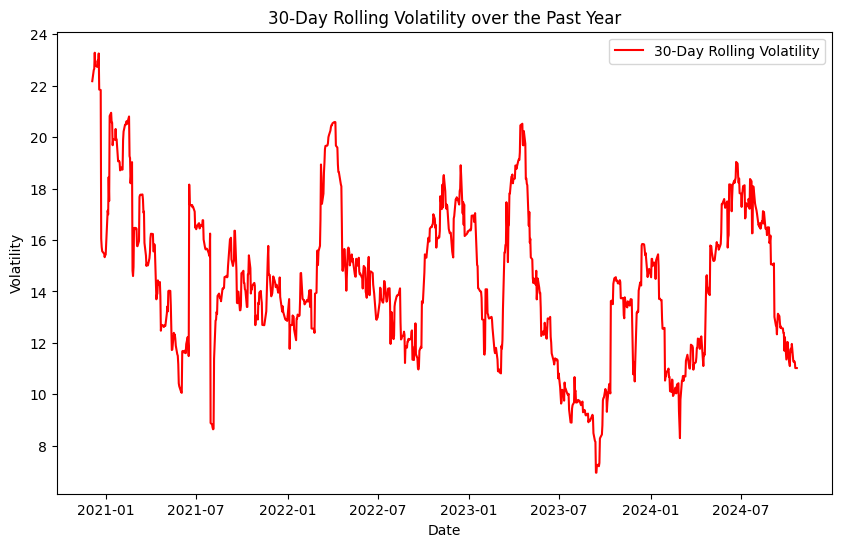

In [14]:

window = 30
df['rolling_volatility'] = log_returns.rolling(window=window).std() * np.sqrt(252)

# Calculează volatilitatea pe anul trecut (standard deviation)
volatility_past_year = log_returns.std() * np.sqrt(252)

print(f'Volatilitatea istorică anualizată: {volatility_past_year:.2%}')

# Grafic al volatilității
plt.figure(figsize=(10,6))
plt.plot(df['rolling_volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('30-Day Rolling Volatility over the Past Year')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

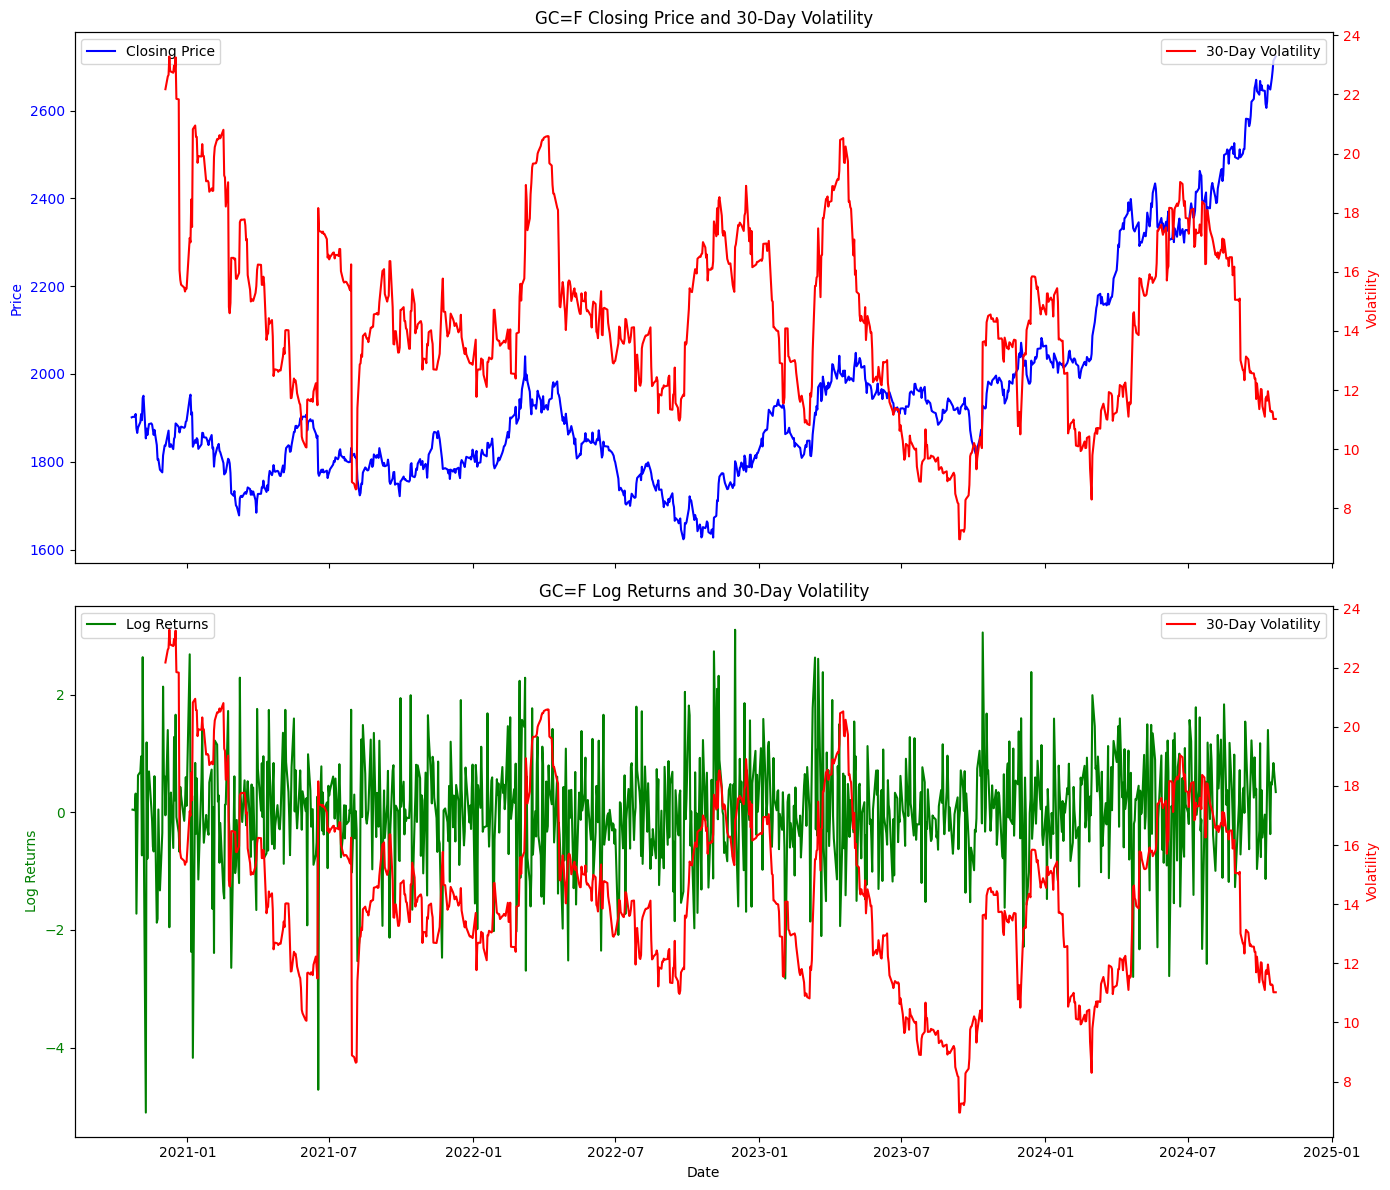

In [16]:

# Create a 2-panel plot: top panel for price & volatility, bottom panel for returns & volatility
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # Increase figure size for better visibility

# Panel 1: Plot closing price and volatility
ax1.plot(df.index, df['Close'], label='Closing Price', color='blue')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title(f'{ticker} Closing Price and {window}-Day Volatility')

# Create a second y-axis for volatility on the first panel
ax1b = ax1.twinx()
ax1b.plot(df.index, df['rolling_volatility'], label=f'{window}-Day Volatility', color='red')
ax1b.set_ylabel('Volatility', color='red')
ax1b.tick_params(axis='y', labelcolor='red')

# Legends for panel 1
ax1.legend(loc='upper left')
ax1b.legend(loc='upper right')

# Panel 2: Plot log returns and volatility
ax2.plot( log_returns, label='Log Returns', color='green')
ax2.set_ylabel('Log Returns', color='green')
ax2.set_xlabel('Date')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_title(f'{ticker} Log Returns and {window}-Day Volatility')

# Create a second y-axis for volatility on the second panel
ax2b = ax2.twinx()
ax2b.plot(df.index, df['rolling_volatility'], label=f'{window}-Day Volatility', color='red')
ax2b.set_ylabel('Volatility', color='red')
ax2b.tick_params(axis='y', labelcolor='red')

# Legends for panel 2
ax2.legend(loc='upper left')
ax2b.legend(loc='upper right')

# Tight layout and save figure with transparent background
plt.tight_layout()
plt.savefig('price_returns_volatility.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

## **Apply Volatility Estimators**

In [25]:
ticker = 'AAPL'  # Gold as an example
start_date = '2020-10-22'
end_date = '2024-10-22'

df_gold = download_data(ticker, start_date, end_date)

def parkinson_volatility(high, low, window=30):
    return np.sqrt((1 / (4 * np.log(2))) * (np.log(high / low) ** 2).rolling(window).mean()) * np.sqrt(252)

df_gold['parkinson_vol'] = parkinson_volatility(df_gold['High'], df_gold['Low'])

def garman_klass_volatility(open, high, low, close, window=30):

    log_high_low = np.log(high / low)
    log_close_open = np.log(close / open)
    return np.sqrt((0.5 * log_high_low ** 2) - (2 * np.log(2) - 1) * log_close_open ** 2).rolling(window).mean() * np.sqrt(252)

df_gold['garman_klass_vol'] = garman_klass_volatility(df_gold['Open'], df_gold['High'], df_gold['Low'], df_gold['Close'])

def rogers_satchell_volatility(open, high, low, close, window=30):
    term1 = np.log(high / close) * np.log(high / open)
    term2 = np.log(low / close) * np.log(low / open)
    return np.sqrt(0.5*(term1 + term2).rolling(window).mean()) * np.sqrt(252)

df_gold['rogers_satchell_vol'] = rogers_satchell_volatility(df_gold['Open'], df_gold['High'], df_gold['Low'], df_gold['Close'])


def yang_zhang_volatility(open_prices, high, low, close, window=30):
    # Step 1: Overnight variance (σ²_O)
    log_oc = np.log(open_prices / close.shift(1))
    overnight_variance = (log_oc - log_oc.rolling(window=window).mean())**2
    sigma_o2 = overnight_variance.rolling(window=window).mean()

    log_co = np.log(close / open_prices)
    close_variance = (log_co - log_co.rolling(window=window).mean())**2
    sigma_c2 = close_variance.rolling(window=window).mean()

    rs_variance = rogers_satchell_volatility(open_prices, high, low, close, window)
    sigma_rs2 = rs_variance ** 2

    k = 0.34


    yz_volatility = np.sqrt(sigma_o2 + k * sigma_c2 + (1 - k) * sigma_rs2)

    return yz_volatility

df_gold['Yang_Zhang_Vol'] = yang_zhang_volatility(df_gold['Open'], df_gold['High'], df_gold['Low'], df_gold['Close'])


[*********************100%***********************]  1 of 1 completed


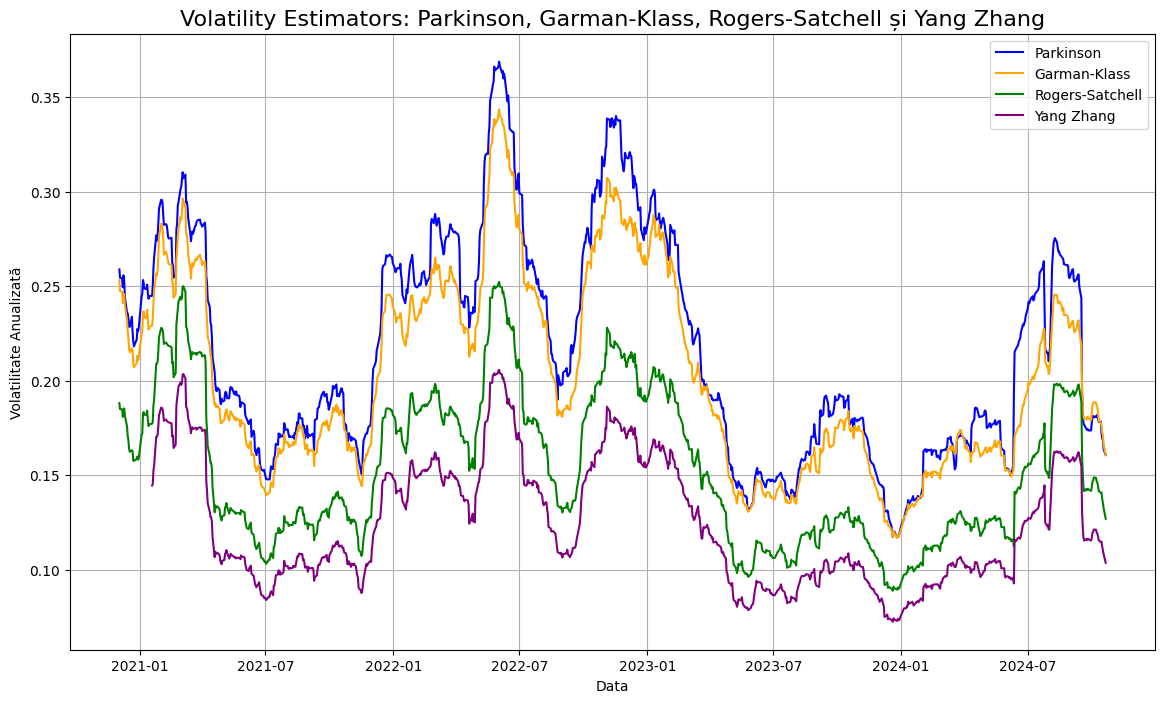

In [26]:
plt.figure(figsize=(14, 8))

plt.plot(df_gold['parkinson_vol'], label='Parkinson', color='blue')
plt.plot(df_gold['garman_klass_vol'], label='Garman-Klass', color='orange')
plt.plot(df_gold['rogers_satchell_vol'], label='Rogers-Satchell', color='green')
plt.plot(df_gold['Yang_Zhang_Vol'], label='Yang Zhang', color='purple')


plt.title('Volatility Estimators: Parkinson, Garman-Klass, Rogers-Satchell și Yang Zhang', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Volatilitate Anualizată')
plt.legend()
plt.grid(True)

# Afișează graficul
plt.show()

### **Volatility clustering**

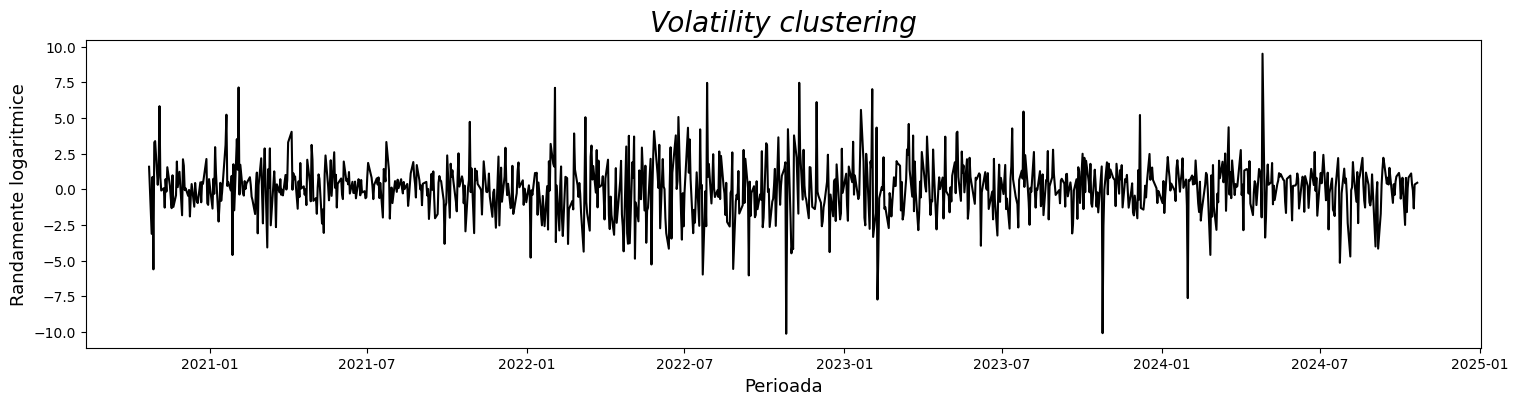

In [56]:
plt.figure(figsize=(18,4), facecolor='white')
plt.plot(log_returns, color='black')

plt.title('Volatility clustering', fontsize=20, fontstyle='italic')
plt.ylabel('Randamente logaritmice', fontsize=13)
plt.xlabel('Perioada', fontsize=13)

plt.show()


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                log_rtn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1341.26
Distribution:                  Normal   AIC:                           2690.51
Method:            Maximum Likelihood   BIC:                           2710.16
                                        No. Observations:                 1004
Date:                Sat, Oct 26 2024   Df Residuals:                     1003
Time:                        19:09:41   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0390  2.928e-02      1.332      0.183 

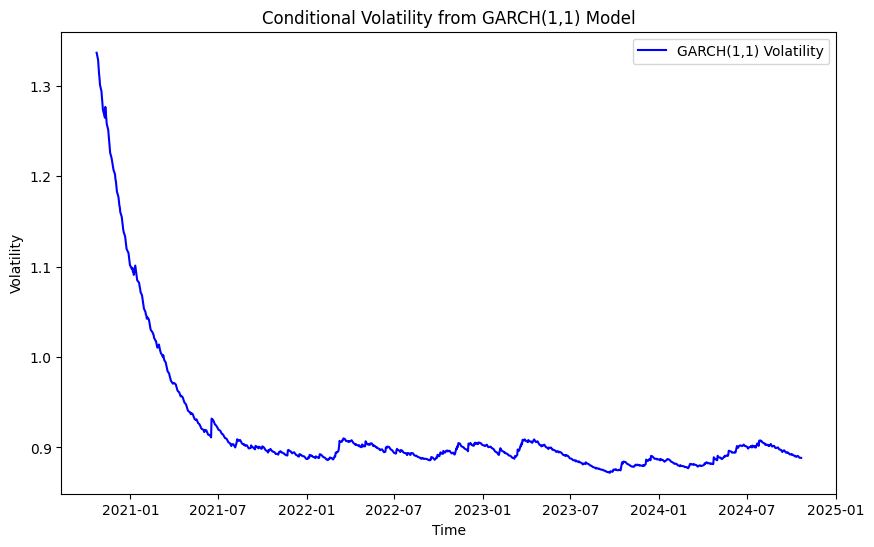

In [61]:
from arch import arch_model

garch_model = arch_model(log_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(update_freq=5, disp="off")

# Print model summary
print(garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(garch_fit.conditional_volatility, color='blue', label='GARCH(1,1) Volatility')
plt.title('Conditional Volatility from GARCH(1,1) Model')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()

Modelul GARCH(1,1) sugerează că volatilitatea aurului este persistentă și prezintă un fenomen de „volatility clustering,” ceea ce înseamnă că perioadele de volatilitate ridicată tind să fie urmate de alte perioade de volatilitate ridicată. În acest model, coeficientul
ω=(0.0141) indică o valoare de bază a volatilității care ar fi prezentă chiar și în absența șocurilor. Aceasta reflectă o volatilitate minimă inerentă aurului, indiferent de schimbările de preț zilnice. Coeficientul
𝛼
α (0.0023), care reprezintă sensibilitatea la șocurile recente, are o valoare mică. Acest lucru înseamnă că șocurile recente, fie ele pozitive sau negative, au un impact redus asupra volatilității pe termen scurt, descriind o condiție de stabilitate. Pe de altă parte, coeficientul
𝛽
β (0.9804) este foarte aproape de 1, sugerând o persistență extrem de ridicată a volatilității. Aceasta înseamnă că, odată ce volatilitatea crește sau scade, este probabil ca această stare să persiste pe termen mai lung, ceea ce este tipic pentru activele financiare cu volatilitate ridicată, cum ar fi aurul.

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                log_rtn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1338.94
Distribution:                  Normal   AIC:                           2687.88
Method:            Maximum Likelihood   BIC:                           2712.44
                                        No. Observations:                 1004
Date:                Sat, Oct 26 2024   Df Residuals:                     1003
Time:                        19:10:30   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0380  2.879e-02      1.322      0.186 

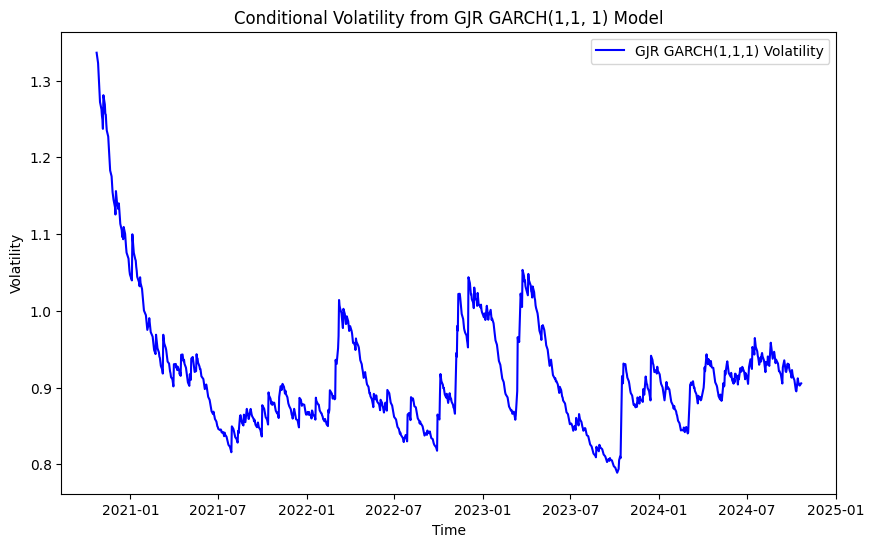

In [62]:

gjr_garch_model = arch_model(log_returns, p=1,o=1, q=1)
gjr_garch_fit = gjr_garch_model.fit(update_freq=5, disp="off")

# Print model summary
print(gjr_garch_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(gjr_garch_fit.conditional_volatility, color='blue', label='GJR GARCH(1,1,1) Volatility')
plt.title('Conditional Volatility from GJR GARCH(1,1, 1) Model')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.show()



Modelul GJR-GARCH(1,1,1) extinde modelul GARCH prin includerea unui termen de asimetrie, reprezentat de coeficientul γ, care captează dacă șocurile negative au un impact diferit asupra volatilității față de cele pozitive. În această interpretare, coeficientul ω este de 0.0154, indicând o volatilitate de bază similară cu cea din modelul GARCH standard. Aceasta reflectă o valoare de volatilitate constantă, prezentă chiar și în lipsa unor fluctuații majore în prețul aurului.

Coeficientul α (0.0205) și coeficientul β (0.9713) sunt foarte similari ca magnitudine cu cei din modelul GARCH, sugerând aceeași persistență ridicată a volatilități.
Un aspect deosebit al modelului GJR-GARCH este coeficientul
𝛾
γ (-0.0205), care ar trebui să indice o asimetrie în volatilități dacă ar fi semnificativ. Cu toate acestea, valoarea sa este mică și nesemnificativă, ceea ce indică faptul că șocurile negative nu au un impact mai mare asupra volatilității decât cele pozitive. Aceasta sugerează că volatilitatea aurului nu este influențată asimetric de șocurile de preț

### **Explore Realized** **Volatility**

In [27]:
def download_intra_day_data(ticker, date, interval='1m'):
    start_time = f"{date}"
    end_time = f"{date}"
    df2 = yf.download(ticker, start=start_time, end=pd.to_datetime(end_time) + pd.Timedelta(days=1), interval=interval)
    return df2


In [28]:
ticker = 'GC=F'  # Gold as an example
date = '2024-10-22'

intraday_data = download_intra_day_data(ticker, date)

[*********************100%***********************]  1 of 1 completed


In [29]:
intraday_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Datetime,,,,,,
2024-10-22 04:00:00+00:00,2745.699951,2745.699951,2746.000000,2745.199951,2745.199951,0
2024-10-22 04:01:00+00:00,2745.899902,2745.899902,2745.899902,2745.600098,2745.699951,33
2024-10-22 04:02:00+00:00,2745.899902,2745.899902,2746.100098,2745.899902,2745.899902,36
2024-10-22 04:03:00+00:00,2746.000000,2746.000000,2746.000000,2745.899902,2745.899902,19
2024-10-22 04:04:00+00:00,2745.899902,2745.899902,2746.100098,2745.899902,2746.000000,24


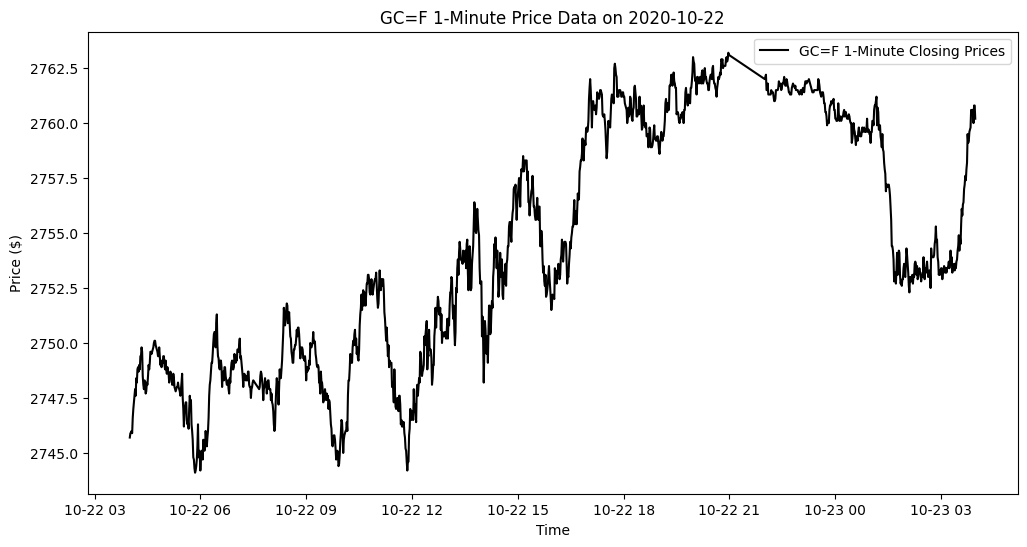

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(intraday_data['Close'], label=f'{ticker} 1-Minute Closing Prices', color='black')
plt.title(f'{ticker} 1-Minute Price Data on {start_date}')
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [31]:
def calculate_realized_volatility(df2):
    df2['log_return_minute'] = np.log(df2['Close'] / df2['Close'].shift(1))  # Log returns
    realized_variance = np.sum(df2['log_return_minute'].dropna()**2)  # Realized variance
    realized_volatility = np.sqrt(realized_variance)  # Realized volatility
    return realized_variance, realized_volatility

In [32]:
realized_variance, realized_volatility = calculate_realized_volatility(intraday_data)

In [33]:
# Function to download data using yfinance
def download_data_2(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

In [53]:
ticker = 'GC=F'  # Gold as an example
start_date = '2020-10-22'
end_date = '2024-10-22'


In [54]:
daily_data = download_data_2(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [55]:
def calculate_daily_volatility(daily_prices):
    daily_returns = np.log(daily_prices['Close'] / daily_prices['Close'].shift(1)).dropna()  # Log returns
    daily_volatility = np.std(daily_returns) * np.sqrt(252)  # Annualized volatility
    return daily_volatility.mean()

In [56]:

historical_daily_volatility = calculate_daily_volatility(daily_data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Realized Variance (Intra-day on 2024-10-22): 0.0000
Realized Volatility (Intra-day on 2024-10-22): 0.0066
Historical Daily Volatility: 0.1475


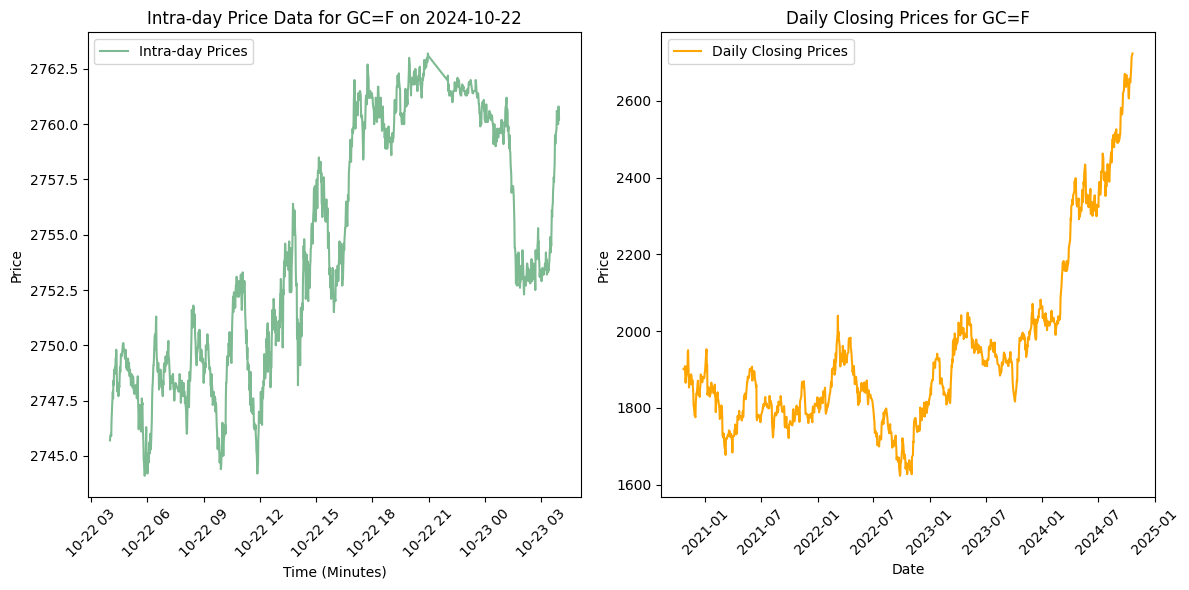

In [57]:
print(f"Realized Variance (Intra-day on {date}): {realized_variance:.4f}")
print(f"Realized Volatility (Intra-day on {date}): {realized_volatility:.4f}")
print(f"Historical Daily Volatility: {historical_daily_volatility:.4f}")

# Plotting for visualization
plt.figure(figsize=(12, 6))

# Plot intraday price data
plt.subplot(1, 2, 1)
plt.plot(intraday_data['Close'], label='Intra-day Prices')
plt.title(f'Intra-day Price Data for {ticker} on {date}')
plt.xlabel('Time (Minutes)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

# Plot daily closing prices
plt.subplot(1, 2, 2)
plt.plot(daily_data['Close'], label='Daily Closing Prices', color='orange')
plt.title(f'Daily Closing Prices for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()